https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb

Last updated: 16 Feb 2023

# PyCaret Binary Classification Tutorial: porto_seguro

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.

## Installation

PyCaret is tested and supported on the following 64-bit systems:

- Python 3.7 – 3.10

- Python 3.9 for Ubuntu only

- Ubuntu 16.04 or later

- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`

- `pip install pycaret[models]`

- `pip install pycaret[tuner]`

- `pip install pycaret[mlops]`

- `pip install pycaret[parallel]`

- `pip install pycaret[test]`

In [1]:
# check installed version

import pycaret

pycaret.__version__

'3.0.1'

## Quick start

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered. 

Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative). 

This module can be used for binary or multiclass problems. It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret consist of following 5 steps in this order:

1. **Setup**

2. **Compare Models**

3. **Analyze Model**

4. **Prediction**

5. **Save Model**

In [2]:
# loading sample dataset from pycaret dataset module

# from pycaret.datasets import get_data
import pandas as pd
import numpy as np

# data = get_data('diabetes')
train_data = pd.read_csv("porto_train.csv")
test_data = pd.read_csv("porto_test.csv")

In [3]:
train_data.head().T

,0,1,2,3,4
id,9.000000,13.000000,16.000000,17.000000,20.000000
target,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_01,1.000000,5.000000,0.000000,0.000000,2.000000
ps_ind_02_cat,1.000000,4.000000,1.000000,2.000000,1.000000
ps_ind_03,7.000000,9.000000,2.000000,0.000000,3.000000
ps_ind_04_cat,0.000000,1.000000,0.000000,1.000000,1.000000
ps_ind_05_cat,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_06_bin,0.000000,0.000000,1.000000,1.000000,0.000000
ps_ind_07_bin,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_08_bin,1.000000,1.000000,0.000000,0.000000,0.000000


In [4]:
train_data = train_data.replace(-1, np.nan)
test_data = test_data.replace(-1, np.nan)

In [5]:
train_data = train_data.drop(["id", "fold"], axis=1)
test_data = test_data.drop(["id"], axis=1)

In [6]:
cat_vars = [col for col in train_data.columns if 'cat' in col]
cat_vars

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [7]:
for col in cat_vars:
    test_data[col] = test_data[col].astype('category')

# TypeError: 'Categorical' with dtype category does not support reduction 'mean'
# cat_vars = cat_vars + ["target"]

for col in cat_vars:
    train_data[col] = train_data[col].astype('category')

## Setup

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [8]:
# import pycaret classification and init setup

from pycaret.classification import *

# s = setup(data, target='Class variable', session_id=123)
s = setup(train_data, target="target", session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(476170, 58)"
4,Transformed data shape,"(476170, 110)"
5,Transformed train set shape,"(333319, 110)"
6,Transformed test set shape,"(142851, 110)"
7,Ordinal features,6
8,Numeric features,43
9,Categorical features,14


Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility
    + If no `session_id` is passed, a random number is automatically generated that is distributed to all functions

- **Target type:**  Binary, Multiclass, or Regression
    + The Target type is automatically detected

- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0: No, 1: Yes) for reference
    + In this tutorial, no label encoding is required since the target variable is of numeric type

- **Original data shape:**  Shape of the original data prior to any transformations

- **Transformed train set shape:**  Shape of transformed train set

- **Transformed test set shape:**  Shape of transformed test set

- **Numeric features:**  The number of features considered as numerical

- **Categorical features:**  The number of features considered as categorical

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [9]:
# import ClassificationExperiment and init the class

from pycaret.classification import ClassificationExperiment

exp = ClassificationExperiment()

In [10]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [11]:
# init setup on exp
# exp.setup(data, target='Class variable', session_id=123)
exp.setup(train_data, target="target", session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(476170, 58)"
4,Transformed data shape,"(476170, 110)"
5,Transformed train set shape,"(333319, 110)"
6,Transformed test set shape,"(142851, 110)"
7,Ordinal features,6
8,Numeric features,43
9,Categorical features,14


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [12]:
# compare baseline models
best = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9635,0.6368,0.0002,0.2000,0.0005,0.0004,0.0057,15.1980
lightgbm,Light Gradient Boosting Machine,0.9635,0.6327,0.0000,0.0000,0.0000,-0.0000,-0.0004,1.8920
ada,Ada Boost Classifier,0.9635,0.6310,0.0000,0.0000,0.0000,0.0000,0.0000,4.6630
lr,Logistic Regression,0.9635,0.6260,0.0000,0.0000,0.0000,0.0000,0.0000,9.3990
lda,Linear Discriminant Analysis,0.9635,0.6256,0.0000,0.0000,0.0000,-0.0000,-0.0002,1.9910
catboost,CatBoost Classifier,0.9635,0.6196,0.0002,0.1250,0.0005,0.0004,0.0045,7.2250
xgboost,Extreme Gradient Boosting,0.9635,0.6125,0.0004,0.1700,0.0008,0.0007,0.0068,18.9560
nb,Naive Bayes,0.8508,0.6021,0.2118,0.0602,0.0938,0.0392,0.0486,1.0580
rf,Random Forest Classifier,0.9635,0.5862,0.0000,0.0000,0.0000,0.0000,0.0000,3.9880
qda,Quadratic Discriminant Analysis,0.8132,0.5849,0.2395,0.0558,0.0857,0.0309,0.0402,2.0620


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [13]:
# compare models using OOP
exp.compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9635,0.6368,0.0002,0.2000,0.0005,0.0004,0.0057,15.2050
lightgbm,Light Gradient Boosting Machine,0.9635,0.6327,0.0000,0.0000,0.0000,-0.0000,-0.0004,1.8680
ada,Ada Boost Classifier,0.9635,0.6310,0.0000,0.0000,0.0000,0.0000,0.0000,4.4650
lr,Logistic Regression,0.9635,0.6260,0.0000,0.0000,0.0000,0.0000,0.0000,9.0250
lda,Linear Discriminant Analysis,0.9635,0.6256,0.0000,0.0000,0.0000,-0.0000,-0.0002,1.5910
catboost,CatBoost Classifier,0.9635,0.6196,0.0002,0.1250,0.0005,0.0004,0.0045,6.9710
xgboost,Extreme Gradient Boosting,0.9635,0.6125,0.0004,0.1700,0.0008,0.0007,0.0068,19.8210
nb,Naive Bayes,0.8508,0.6021,0.2118,0.0602,0.0938,0.0392,0.0486,1.5500
rf,Random Forest Classifier,0.9635,0.5862,0.0000,0.0000,0.0000,0.0000,0.0000,3.6180
qda,Quadratic Discriminant Analysis,0.8132,0.5849,0.2395,0.0558,0.0857,0.0309,0.0402,2.2100


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only. 

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

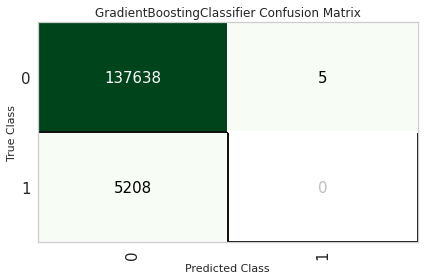

In [14]:
# plot confusion matrix
plot_model(best, plot='confusion_matrix')

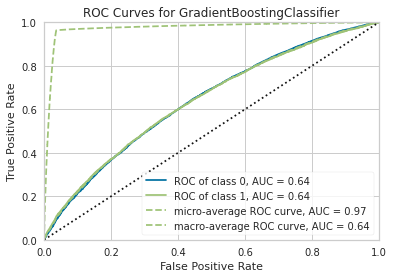

In [15]:
# plot AUC
plot_model(best, plot='auc')

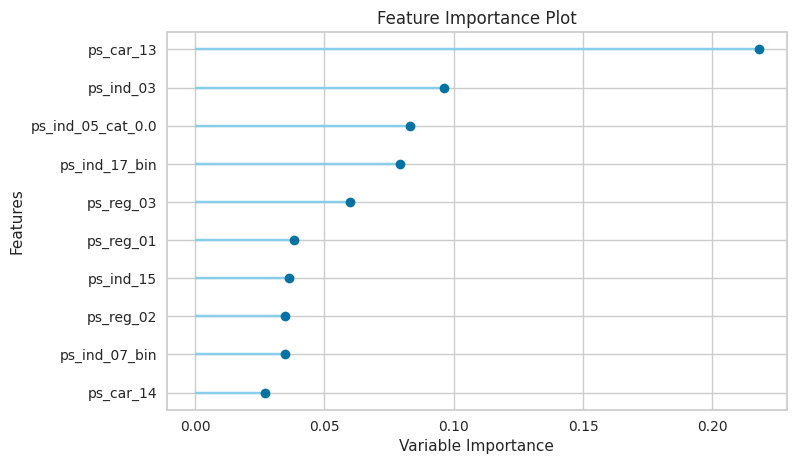

In [16]:
# plot feature importance
plot_model(best, plot='feature')

In [17]:
# check docstring to see available plots 
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, use_train_data: bool = False, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Na

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [18]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction

The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [19]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9635,0.6396,0.0000,0.0000,0.0000,-0.0001,-0.0012


In [20]:
# show predictions df
holdout_pred.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target,prediction_label,prediction_score
44580,0,3.0,4,0.0,0.0,0,1,0,0,0,...,5,0,1,0,0,1,0,0,0,0.9608
172827,1,1.0,6,0.0,4.0,1,0,0,0,0,...,7,0,1,1,0,0,0,0,0,0.9702
101116,2,1.0,2,1.0,0.0,0,0,1,0,0,...,8,0,1,1,0,0,0,0,0,0.9670
238247,5,1.0,5,0.0,1.0,1,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0.9667
404678,0,1.0,1,1.0,0.0,0,1,0,0,0,...,8,0,1,0,0,0,0,0,0,0.9149


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [21]:
# copy data and drop Class variable
# new_data = data.copy()
new_data = test_data.copy()
# new_data.drop('Class variable', axis=1, inplace=True)
new_data.drop("target", axis=1, inplace=True)
new_data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2.0,5,1.0,0.0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,5,1.0,4,0.0,0.0,0,0,0,1,0,...,4,2,0,9,0,1,0,1,1,1
2,5,1.0,11,0.0,0.0,0,0,0,1,0,...,4,1,3,9,0,0,0,0,1,0
3,5,1.0,8,0.0,0.0,1,0,0,0,0,...,3,1,6,5,0,0,0,1,0,0
4,0,1.0,2,0.0,0.0,1,0,0,0,0,...,7,2,2,4,0,1,0,0,1,0


In [22]:
# predict model on new_data
# predictions = predict_model(best, data=new_data)
predictions = predict_model(best, data=test_data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9636,0.6328,0.0000,0.0000,0.0000,-0.0000,-0.0006


,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target,prediction_label,prediction_score
0,2,2.0,5,1.0,0.0,0,1,0,0,0,...,8,0,1,1,0,0,1,0,0,0.9519
1,5,1.0,4,0.0,0.0,0,0,0,1,0,...,9,0,1,0,1,1,1,0,0,0.9567
2,5,1.0,11,0.0,0.0,0,0,0,1,0,...,9,0,0,0,0,1,0,0,0,0.9718
3,5,1.0,8,0.0,0.0,1,0,0,0,0,...,5,0,0,0,1,0,0,0,0,0.9815
4,0,1.0,2,0.0,0.0,1,0,0,0,0,...,4,0,1,0,0,1,0,0,0,0.9742


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [23]:
# save pipeline
save_model(best, 'my_first_pipeline1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ps_ind_01', 'ps_ind_03',
                                              'ps_ind_06_bin', 'ps_ind_07_bin',
                                              'ps_ind_08_bin', 'ps_ind_09_bin',
                                              'ps_ind_10_bin', 'ps_ind_11_bin',
                                              'ps_ind_12_bin', 'ps_ind_13_bin',
                                              'ps_ind_14', 'ps_ind_15',
                                              'ps_ind_16_bin', 'ps_ind_17_bin',
                                              'ps_ind_18_bin', 'ps_reg_...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_depth=3, max_features=None,


In [24]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline1')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['ps_ind_01', 'ps_ind_03',
                                             'ps_ind_06_bin', 'ps_ind_07_bin',
                                             'ps_ind_08_bin', 'ps_ind_09_bin',
                                             'ps_ind_10_bin', 'ps_ind_11_bin',
                                             'ps_ind_12_bin', 'ps_ind_13_bin',
                                             'ps_ind_14', 'ps_ind_15',
                                             'ps_ind_16_bin', 'ps_ind_17_bin',
                                             'ps_ind_18_bin', 'ps_reg_...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

## Detailed function-by-function overview

### Setup

This function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [25]:
# init setup function
# s = setup(data, target='Class variable', session_id=123)
s = setup(train_data, target="target", session_id=123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(476170, 58)"
4,Transformed data shape,"(476170, 110)"
5,Transformed train set shape,"(333319, 110)"
6,Transformed test set shape,"(142851, 110)"
7,Ordinal features,6
8,Numeric features,43
9,Categorical features,14


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [26]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [27]:
# lets access X_train_transformed
get_config('X_train_transformed')

,ps_ind_01,ps_ind_02_cat_1.0,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat_0.0,ps_ind_05_cat_2.0,ps_ind_05_cat_1.0,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
45773,4.0,1.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0,0.0,...,8.0,1.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0
435899,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,...,5.0,0.0,4.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0
227285,2.0,1.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0,0.0,...,6.0,1.0,3.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0
54927,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,8.0,2.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
320181,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,6.0,0.0,2.0,14.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76277,3.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,...,4.0,1.0,2.0,10.0,0.0,1.0,0.0,0.0,1.0,0.0
438984,1.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0
4190,1.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,...,5.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
18523,3.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,7.0,2.0,3.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0


In [28]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

The current seed is: 123


In [29]:
# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [30]:
help(setup)

Help on function setup in module pycaret.classification.functional:

setup(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse.base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse.base.spmatrix, pandas.core.frame.DataFrame]]] = None, target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, train_size: float = 0.7, test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse.base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, ordinal_features: Optional[Dict[str, list]] = None, numeric_features: Optional[List[str]] = None, categorical_features: Optional[List[str]] = None, date_features: Optional[List[str]] = None, text_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, keep_features: Optional[List[str]] = None, preprocess: bo

In [31]:
# init setup with normalize = True

# s = setup(data, target='Class variable', session_id=123, normalize=True, normalize_method='minmax')
s = setup(train_data, target="target", session_id=123, normalize=True, normalize_method='minmax')

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(476170, 58)"
4,Transformed data shape,"(476170, 110)"
5,Transformed train set shape,"(333319, 110)"
6,Transformed test set shape,"(142851, 110)"
7,Ordinal features,6
8,Numeric features,43
9,Categorical features,14


In [33]:
# lets check the X_train_transformed to see effect of params passed
# get_config('X_train_transformed')['Number of times pregnant'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

In [34]:
# get_config('X_train')['Number of times pregnant'].hist()

___

### Compare Models

This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [35]:
best = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9635,0.6368,0.0002,0.2000,0.0005,0.0004,0.0057,15.2820
lightgbm,Light Gradient Boosting Machine,0.9635,0.6327,0.0000,0.0000,0.0000,-0.0000,-0.0004,1.8660
ada,Ada Boost Classifier,0.9635,0.6310,0.0000,0.0000,0.0000,0.0000,0.0000,4.8760
lr,Logistic Regression,0.9635,0.6259,0.0000,0.0000,0.0000,0.0000,0.0000,6.8860
lda,Linear Discriminant Analysis,0.9635,0.6256,0.0000,0.0000,0.0000,-0.0000,-0.0002,1.5740
catboost,CatBoost Classifier,0.9635,0.6196,0.0002,0.1250,0.0005,0.0004,0.0045,7.2260
xgboost,Extreme Gradient Boosting,0.9635,0.6125,0.0004,0.1700,0.0008,0.0007,0.0068,22.3050
nb,Naive Bayes,0.8508,0.6021,0.2118,0.0602,0.0938,0.0393,0.0486,1.3740
rf,Random Forest Classifier,0.9635,0.5860,0.0000,0.0000,0.0000,0.0000,0.0000,3.9630
et,Extra Trees Classifier,0.9635,0.5841,0.0000,0.0000,0.0000,0.0000,0.0000,4.1600


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [36]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [37]:
compare_tree_models = compare_models(include=['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'], sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9635,0.6368,0.0002,0.2000,0.0005,0.0004,0.0057,16.0260
lightgbm,Light Gradient Boosting Machine,0.9635,0.6327,0.0000,0.0000,0.0000,-0.0000,-0.0004,1.3810
catboost,CatBoost Classifier,0.9635,0.6196,0.0002,0.1250,0.0005,0.0004,0.0045,7.4860
xgboost,Extreme Gradient Boosting,0.9635,0.6125,0.0004,0.1700,0.0008,0.0007,0.0068,14.0060
rf,Random Forest Classifier,0.9635,0.5860,0.0000,0.0000,0.0000,0.0000,0.0000,4.1050
et,Extra Trees Classifier,0.9635,0.5841,0.0000,0.0000,0.0000,0.0000,0.0000,6.7760
dt,Decision Tree Classifier,0.9195,0.5081,0.0643,0.0481,0.0550,0.0139,0.0141,2.6970


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [38]:
compare_tree_models

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [39]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9635,0.6368,0.0002,0.2000,0.0005,0.0004,0.0057,16.026
lightgbm,Light Gradient Boosting Machine,0.9635,0.6327,0.0000,0.0000,0.0000,-0.0000,-0.0004,1.381
catboost,CatBoost Classifier,0.9635,0.6196,0.0002,0.1250,0.0005,0.0004,0.0045,7.486
xgboost,Extreme Gradient Boosting,0.9635,0.6125,0.0004,0.1700,0.0008,0.0007,0.0068,14.006
rf,Random Forest Classifier,0.9635,0.5860,0.0000,0.0000,0.0000,0.0000,0.0000,4.105
et,Extra Trees Classifier,0.9635,0.5841,0.0000,0.0000,0.0000,0.0000,0.0000,6.776
dt,Decision Tree Classifier,0.9195,0.5081,0.0643,0.0481,0.0550,0.0139,0.0141,2.697


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `Recall`.

In [40]:
# best_recall_models_top3 = compare_models(sort='Recall', n_select=3)
best_recall_models_top3 = compare_models(sort='AUC', n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9635,0.6368,0.0002,0.2000,0.0005,0.0004,0.0057,15.1010
lightgbm,Light Gradient Boosting Machine,0.9635,0.6327,0.0000,0.0000,0.0000,-0.0000,-0.0004,1.7820
ada,Ada Boost Classifier,0.9635,0.6310,0.0000,0.0000,0.0000,0.0000,0.0000,4.7610
lr,Logistic Regression,0.9635,0.6259,0.0000,0.0000,0.0000,0.0000,0.0000,3.5660
lda,Linear Discriminant Analysis,0.9635,0.6256,0.0000,0.0000,0.0000,-0.0000,-0.0002,1.7220
catboost,CatBoost Classifier,0.9635,0.6196,0.0002,0.1250,0.0005,0.0004,0.0045,7.1990
xgboost,Extreme Gradient Boosting,0.9635,0.6125,0.0004,0.1700,0.0008,0.0007,0.0068,19.7360
nb,Naive Bayes,0.8508,0.6021,0.2118,0.0602,0.0938,0.0393,0.0486,1.5880
rf,Random Forest Classifier,0.9635,0.5860,0.0000,0.0000,0.0000,0.0000,0.0000,4.1070
et,Extra Trees Classifier,0.9635,0.5841,0.0000,0.0000,0.0000,0.0000,0.0000,4.1330


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [41]:
# list of top 3 models by Recall
best_recall_models_top3

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lamb

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [42]:
help(compare_models)

Help on function compare_models in module pycaret.classification.functional:

compare_models(include: Optional[List[Union[str, Any]]] = None, exclude: Optional[List[str]] = None, fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, sort: str = 'Accuracy', n_select: int = 1, budget_time: Optional[float] = None, turbo: bool = True, errors: str = 'ignore', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, probability_threshold: Optional[float] = None, engine: Optional[Dict[str, str]] = None, verbose: bool = True, parallel: Optional[pycaret.internal.parallel.parallel_backend.ParallelBackend] = None) -> Union[Any, List[Any]]
    This function trains and evaluates performance of all estimators available in the
    model library using cross validation. The output of this function is a score grid
    with average cross validated scores. Metrics evaluated during CV can be access

### Set Custom Metrics

In [43]:
# check available metrics used in CV
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7fd1a22ccca0>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7fd1a22ccdc0>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7fd1a22ccee0>,make_scorer(matthews_corrcoef),pred,{},True,True,False


In [44]:
# create a custom function

import numpy as np

def custom_metric(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (100), 0)
    fp = np.where((y_pred==1) & (y==0), -5, 0)
    return np.sum([tp,fp])

# add metric to PyCaret
add_metric('custom_metric', 'Custom Metric', custom_metric)

Name                                              Custom Metric
Display Name                                      Custom Metric
Score Function       <function custom_metric at 0x7fd2e04b9dc0>
Scorer                               make_scorer(custom_metric)
Target                                                     pred
Args                                                         {}
Greater is Better                                          True
Multiclass                                                 True
Custom                                                     True
Name: custom_metric, dtype: object

In [45]:
# now let's run compare_models again
compare_models()  # sort='AUC' ?

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Custom Metric,TT (Sec)
lr,Logistic Regression,0.9635,0.6259,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.4630
svm,SVM - Linear Kernel,0.9635,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.2900
ridge,Ridge Classifier,0.9635,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7470
rf,Random Forest Classifier,0.9635,0.5860,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.7730
ada,Ada Boost Classifier,0.9635,0.6310,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.9540
gbc,Gradient Boosting Classifier,0.9635,0.6368,0.0002,0.2000,0.0005,0.0004,0.0057,22.5000,15.9670
lda,Linear Discriminant Analysis,0.9635,0.6256,0.0000,0.0000,0.0000,-0.0000,-0.0002,-1.0000,2.0020
et,Extra Trees Classifier,0.9635,0.5841,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.1510
xgboost,Extreme Gradient Boosting,0.9635,0.6125,0.0004,0.1700,0.0008,0.0007,0.0068,39.0000,20.3480
lightgbm,Light Gradient Boosting Machine,0.9635,0.6327,0.0000,0.0000,0.0000,-0.0000,-0.0004,-2.0000,1.7630


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# remove custom metric
remove_metric('custom_metric')

### Experiment Logging

PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [47]:
from pycaret.classification import *

# s = setup(data, target='Class variable', log_experiment='mlflow', experiment_name='diabetes_experiment')
s = setup(train_data, target="target", log_experiment='mlflow', experiment_name='porto_experiment')

,Description,Value
0,Session id,225
1,Target,target
2,Target type,Binary
3,Original data shape,"(476170, 58)"
4,Transformed data shape,"(476170, 110)"
5,Transformed train set shape,"(333319, 110)"
6,Transformed test set shape,"(142851, 110)"
7,Ordinal features,6
8,Numeric features,43
9,Categorical features,14


2023/07/03 18:15:34 INFO mlflow.tracking.fluent: Experiment with name 'porto_experiment' does not exist. Creating a new experiment.


In [48]:
# compare models
best = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9635,0.6383,0.0003,0.1667,0.0007,0.0006,0.0063,15.2240
lightgbm,Light Gradient Boosting Machine,0.9635,0.6347,0.0001,0.0500,0.0002,0.0002,0.0019,1.6060
ada,Ada Boost Classifier,0.9635,0.6326,0.0000,0.0000,0.0000,0.0000,0.0000,4.5840
lr,Logistic Regression,0.9635,0.6275,0.0000,0.0000,0.0000,0.0000,0.0000,14.7990
lda,Linear Discriminant Analysis,0.9635,0.6275,0.0001,0.1000,0.0002,0.0002,0.0027,1.3730
catboost,CatBoost Classifier,0.9635,0.6221,0.0003,0.3500,0.0007,0.0006,0.0099,7.5860
xgboost,Extreme Gradient Boosting,0.9635,0.6138,0.0005,0.1583,0.0010,0.0008,0.0068,20.0800
nb,Naive Bayes,0.8448,0.6053,0.2205,0.0596,0.0939,0.0387,0.0488,0.3350
qda,Quadratic Discriminant Analysis,0.8287,0.5896,0.2262,0.0568,0.0874,0.0329,0.0423,7.9070
rf,Random Forest Classifier,0.9635,0.5894,0.0000,0.0000,0.0000,0.0000,0.0000,3.9310


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [49]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
- mlflow

- wandb

- comet_ml

- dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags

- log_plots

- log_data

- log_profile

For more information check out the docstring of the `setup` function.

In [50]:
help(setup)

Help on function setup in module pycaret.classification.functional:

setup(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse.base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse.base.spmatrix, pandas.core.frame.DataFrame]]] = None, target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, train_size: float = 0.7, test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse.base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, ordinal_features: Optional[Dict[str, list]] = None, numeric_features: Optional[List[str]] = None, categorical_features: Optional[List[str]] = None, date_features: Optional[List[str]] = None, text_features: Optional[List[str]] = None, ignore_features: Optional[List[str]] = None, keep_features: Optional[List[str]] = None, preprocess: bo

### Create Model

This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [51]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [52]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9635,0.6092,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9635,0.6299,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9635,0.6204,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9635,0.6385,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9635,0.6378,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9635,0.6325,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9635,0.6389,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9635,0.6052,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9635,0.6305,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [53]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9635,0.6092,0.0,0.0,0.0,0.0,0.0
1,0.9635,0.6299,0.0,0.0,0.0,0.0,0.0
2,0.9635,0.6204,0.0,0.0,0.0,0.0,0.0
3,0.9635,0.6385,0.0,0.0,0.0,0.0,0.0
4,0.9635,0.6378,0.0,0.0,0.0,0.0,0.0
5,0.9635,0.6325,0.0,0.0,0.0,0.0,0.0
6,0.9635,0.6389,0.0,0.0,0.0,0.0,0.0
7,0.9635,0.6052,0.0,0.0,0.0,0.0,0.0
8,0.9635,0.6305,0.0,0.0,0.0,0.0,0.0


In [54]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9635,0.6231,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9635,0.6325,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9635,0.6245,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9635,0.6267,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0000,0.0041,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [55]:
# train logistic regression with specific model parameters
create_model('lr', C=0.5, l1_ratio=0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9635,0.6093,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9635,0.6300,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9635,0.6205,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9635,0.6381,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9635,0.6380,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9635,0.6326,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9635,0.6389,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9635,0.6052,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9635,0.6307,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=225, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=225, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# change the probability threshold of classifier from 0.5 to 0.66
create_model('lr', probability_threshold = 0.66)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9635,0.6092,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9635,0.6299,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9635,0.6204,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9635,0.6385,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9635,0.6378,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9635,0.6325,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9635,0.6389,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9635,0.6052,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9635,0.6305,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(C=1.0, class_weight=None,
                                     classifier=LogisticRegression(C=1.0,
                                                                   class_weight=None,
                                                                   dual=False,
                                                                   fit_intercept=True,
                                                                   intercept_scaling=1,
                                                                   l1_ratio=None,
                                                                   max_iter=1000,
                                                                   multi_class='auto',
                                                                   n_jobs=None,
                                                                   penalty='l2',
                                                                   random_state=225,
                                                                   solver='lbfgs',
                                                                   tol=0.0001,
                                                                   verbose=0,
                                                                   warm_start=False),
                                     dual=False, fit_intercept=True,
                                     intercept_scaling=1, l1_ratio=None,
                                     max_iter=1000, multi_class='auto',
                                     n_jobs=None, penalty='l2',
                                     probability_threshold=0.66,
                                     random_state=225, solver='lbfgs',
                                     tol=0.0001, verbose=0, warm_start=False)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [58]:
help(create_model)

Help on function create_model in module pycaret.classification.functional:

create_model(estimator: Union[str, Any], fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, engine: Optional[str] = None, verbose: bool = True, return_train_score: bool = False, **kwargs) -> Any
    This function trains and evaluates the performance of a given estimator
    using cross validation. The output of this function is a score grid with
    CV scores by fold. Metrics evaluated during CV can be accessed using the
    ``get_metrics`` function. Custom metrics can be added or removed using
    ``add_metric`` and ``remove_metric`` function. All the available models
    can be accessed using the ``models`` function.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >

### Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [59]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9181,0.5030,0.0551,0.0407,0.0468,0.0051,0.0051
1,0.9205,0.5030,0.0527,0.0410,0.0461,0.0053,0.0053
2,0.9188,0.5069,0.0626,0.0463,0.0532,0.0118,0.0119
3,0.9184,0.5067,0.0626,0.0459,0.0529,0.0114,0.0115
4,0.9177,0.4992,0.0477,0.0353,0.0406,-0.0014,-0.0015
5,0.9170,0.5031,0.0568,0.0408,0.0475,0.0053,0.0054
6,0.9180,0.5033,0.0560,0.0411,0.0474,0.0056,0.0057
7,0.9182,0.5042,0.0576,0.0423,0.0488,0.0071,0.0072
8,0.9168,0.5027,0.0559,0.0402,0.0468,0.0045,0.0045


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [60]:
# tune hyperparameters of dt
# tuned_dt = tune_model(dt)
tuned_dt = tune_model(dt, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9635,0.5846,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9635,0.5893,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9635,0.5870,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9635,0.5925,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9635,0.5912,0.0000,0.0000,0.0000,-0.0001,-0.0011
5,0.9635,0.6004,0.0016,0.5000,0.0033,0.0030,0.0271
6,0.9635,0.5892,0.0000,0.0000,0.0000,-0.0001,-0.0015
7,0.9635,0.5715,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9635,0.5937,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter. 

In [61]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=225, splitter='best')

In [62]:
# define tuning grid
dt_grid = {'max_depth': [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
# tuned_dt = tune_model(dt, custom_grid=dt_grid, optimize='F1')
tuned_dt = tune_model(dt, custom_grid=dt_grid, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,0.5876,0.0008,0.0476,0.0016,0.0004,0.0015
1,0.9629,0.6113,0.0008,0.0435,0.0016,0.0003,0.0010
2,0.9632,0.6004,0.0025,0.1579,0.0049,0.0037,0.0155
3,0.9633,0.6081,0.0033,0.2353,0.0065,0.0055,0.0240
4,0.9632,0.6029,0.0016,0.1333,0.0033,0.0024,0.0110
5,0.9632,0.6151,0.0008,0.0667,0.0016,0.0007,0.0034
6,0.9632,0.6237,0.0041,0.2273,0.0081,0.0068,0.0262
7,0.9632,0.5994,0.0016,0.1333,0.0033,0.0024,0.0110
8,0.9630,0.6116,0.0000,0.0000,0.0000,-0.0011,-0.0045


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [63]:
# to access the tuner object you can set return_tuner = True
# tuned_dt, tuner = tune_model(dt, return_tuner=True)
tuned_dt, tuner = tune_model(dt, return_tuner=True, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9635,0.5846,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9635,0.5893,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9635,0.5870,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9635,0.5925,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9635,0.5912,0.0000,0.0000,0.0000,-0.0001,-0.0011
5,0.9635,0.6004,0.0016,0.5000,0.0033,0.0030,0.0271
6,0.9635,0.5892,0.0000,0.0000,0.0000,-0.0001,-0.0015
7,0.9635,0.5715,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9635,0.5937,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [64]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_samples_leaf=5,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       random_state=225, splitter='best')

In [65]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=FastMemory(location=/tmp/joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['ps_ind_01',
                                                                          'ps_ind_03',
                                                                          'ps_ind_06_bin',
                                                                          'ps_ind_07_bin',
                                                                          'ps_ind_08_bin',
                                                                          'ps_ind_09_bin',
                                                                          'ps_ind_10_bin',
                                                                          'ps_ind_11_bin',
                                                                          'ps...
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=225, refit=False,
                   return_train_score=False,
                   scoring=make_scorer(roc_auc_score, needs_proba=True, error_score=0.0, average=weighted, multi_class=ovr),
                   verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [66]:
# tune dt using optuna
# tuned_dt = tune_model(dt, search_library='optuna')
tuned_dt = tune_model(dt, search_library='optuna', optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9626,0.5752,0.0016,0.0541,0.0032,0.0010,0.0031
1,0.9620,0.5977,0.0074,0.1324,0.0140,0.0102,0.0231
2,0.9624,0.5836,0.0058,0.1321,0.0110,0.0080,0.0204
3,0.9623,0.5925,0.0033,0.0816,0.0063,0.0035,0.0093
4,0.9624,0.5832,0.0033,0.0870,0.0063,0.0037,0.0100
5,0.9625,0.6004,0.0041,0.1111,0.0079,0.0053,0.0146
6,0.9621,0.5984,0.0066,0.1250,0.0125,0.0089,0.0207
7,0.9621,0.5821,0.0016,0.0377,0.0032,0.0001,0.0003
8,0.9622,0.6045,0.0016,0.0408,0.0032,0.0003,0.0009


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-07-03 18:54:34,944] Searching the best hyperparameters using 333319 samples...
[I 2023-07-03 18:57:54,207] Finished hyperparemeter search!


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [67]:
help(tune_model)

Help on function tune_model in module pycaret.classification.functional:

tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'Accuracy', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Optional[str] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, return_train_score: bool = False, **kwargs) -> Any
    This function tunes the hyperparameters of a given estimator. The output of
    this function is a score grid with CV scores by fold of the best selected
    model based on ``optimize`` parameter. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using 

### Ensemble Model

This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [68]:
# ensemble with bagging
ensemble_model(dt, method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9633,0.5388,0.0000,0.0000,0.0000,-0.0004,-0.0028
1,0.9633,0.5344,0.0000,0.0000,0.0000,-0.0004,-0.0028
2,0.9633,0.5261,0.0000,0.0000,0.0000,-0.0004,-0.0028
3,0.9634,0.5488,0.0016,0.2000,0.0033,0.0027,0.0151
4,0.9634,0.5321,0.0008,0.1250,0.0016,0.0012,0.0073
5,0.9632,0.5374,0.0016,0.1333,0.0033,0.0024,0.0110
6,0.9634,0.5432,0.0000,0.0000,0.0000,-0.0004,-0.0026
7,0.9631,0.5327,0.0008,0.0625,0.0016,0.0007,0.0030
8,0.9633,0.5371,0.0000,0.0000,0.0000,-0.0005,-0.0030


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=225,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=225, verbose=0,
                  warm_start=False)

In [69]:
# ensemble with boosting
ensemble_model(dt, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9177,0.5039,0.0576,0.0420,0.0486,0.0067,0.0068
1,0.9217,0.5048,0.0551,0.0438,0.0488,0.0086,0.0086
2,0.9199,0.5070,0.0617,0.0467,0.0532,0.0122,0.0123
3,0.9182,0.5034,0.0560,0.0413,0.0475,0.0058,0.0059
4,0.9191,0.5051,0.0584,0.0437,0.0500,0.0087,0.0088
5,0.9180,0.5037,0.0568,0.0416,0.0481,0.0063,0.0063
6,0.9178,0.5044,0.0584,0.0426,0.0493,0.0074,0.0075
7,0.9189,0.5065,0.0617,0.0458,0.0526,0.0112,0.0113
8,0.9188,0.5029,0.0543,0.0407,0.0465,0.0050,0.0051


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=225,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=225)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [70]:
help(ensemble_model)

Help on function ensemble_model in module pycaret.classification.functional:

ensemble_model(estimator, method: str = 'Bagging', fold: Union[int, Any, NoneType] = None, n_estimators: int = 10, round: int = 4, choose_better: bool = False, optimize: str = 'Accuracy', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function ensembles a given estimator. The output of this function is
    a score grid with CV scores by fold. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> dt = create_model('d

### Blend Models

This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [71]:
# top 3 models based on recall
best_recall_models_top3

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lamb

In [72]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9635,0.6221,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9635,0.6391,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9635,0.6268,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9635,0.6472,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9635,0.6427,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9635,0.6550,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9636,0.6482,0.0008,1.0000,0.0016,0.0016,0.0282
7,0.9635,0.6204,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9635,0.6401,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=Non...
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn',
                                             subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0)),
                             ('str',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator='deprecated',
                                                 estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=123))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- method
- weights
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [73]:
help(blend_models)

Help on function blend_models in module pycaret.classification.functional:

blend_models(estimator_list: list, fold: Union[int, Any, NoneType] = None, round: int = 4, choose_better: bool = False, optimize: str = 'Accuracy', method: str = 'auto', weights: Optional[List[float]] = None, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function trains a Soft Voting / Majority Rule classifier for select
    models passed in the ``estimator_list`` param. The output of this function
    is a score grid with CV scores by fold. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or removed using ``add_metric`` and ``remove_metric`` function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classificatio

### Stack Models

This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [74]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9635,0.6122,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9635,0.6327,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9635,0.6231,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9635,0.6405,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9635,0.6403,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9635,0.6361,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9635,0.6416,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9635,0.6082,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9635,0.6347,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Gradient Boosting Classifier',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='log_loss',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           n_estimators=100,
                                                           n_iter_no_cha...
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=123))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=225,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- method
- restack
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [75]:
help(stack_models)

Help on function stack_models in module pycaret.classification.functional:

stack_models(estimator_list: list, meta_model=None, meta_model_fold: Union[int, Any, NoneType] = 5, fold: Union[int, Any, NoneType] = None, round: int = 4, method: str = 'auto', restack: bool = True, choose_better: bool = False, optimize: str = 'Accuracy', fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function trains a meta model over select estimators passed in
    the ``estimator_list`` parameter. The output of this function is a
    score grid with CV scores by fold. Metrics evaluated during CV can
    be accessed using the ``get_metrics`` function. Custom metrics
    can be added or removed using ``add_metric`` and ``remove_metric``
    function.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
 

### Plot Model

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

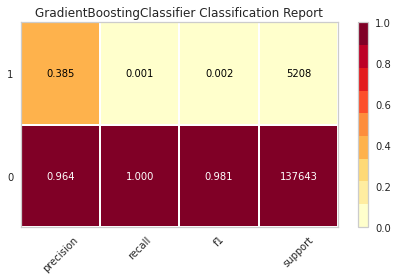

In [76]:
# plot class report
plot_model(best, plot='class_report')

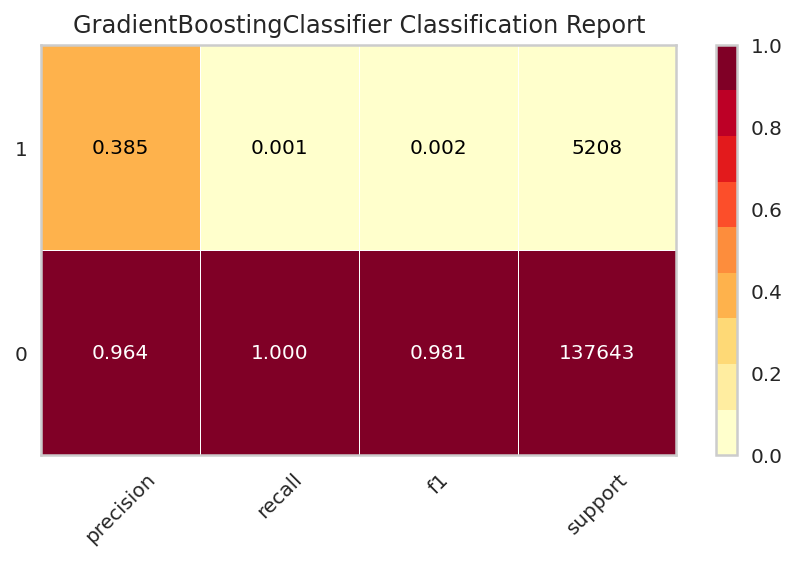

In [77]:
# to control the scale of plot
plot_model(best, plot='class_report', scale=2)

In [78]:
# to save the plot
plot_model(best, plot='class_report', save=True)

'Class Report.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- use_train_data
- display_format

You can check the docstring of the function for more info.

In [79]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, use_train_data: bool = False, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Na

### Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see:

https://shap.readthedocs.io/en/latest/

In [80]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9635,0.6201,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9635,0.6377,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9635,0.6178,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9635,0.6440,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9635,0.6383,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9635,0.6524,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9635,0.6433,0.0008,0.5000,0.0016,0.0015,0.0192
7,0.9635,0.6174,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9635,0.6330,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


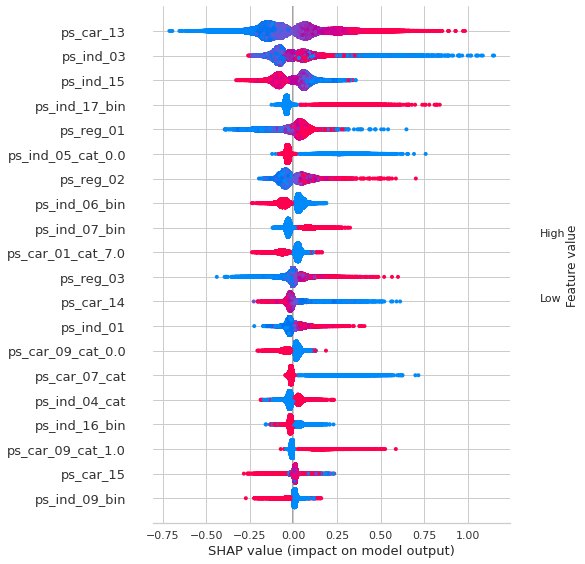

In [81]:
# interpret summary model
interpret_model(lightgbm, plot='summary')

In [82]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot='reason', observation=1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [83]:
help(interpret_model)

Help on function interpret_model in module pycaret.classification.functional:

interpret_model(estimator, plot: str = 'summary', feature: Optional[str] = None, observation: Optional[int] = None, use_train_data: bool = False, X_new_sample: Optional[pandas.core.frame.DataFrame] = None, y_new_sample: Optional[pandas.core.frame.DataFrame] = None, save: Union[str, bool] = False, **kwargs)
    This function takes a trained model object and returns an interpretation plot
    based on the test / hold-out set.
    
    This function is implemented based on the SHAP (SHapley Additive exPlanations),
    which is a unified approach to explain the output of any machine learning model.
    SHAP connects game theory with local explanations.
    
    For more information: https://shap.readthedocs.io/en/latest/
    
    For more information on Partial Dependence Plot: https://github.com/SauceCat/PDPbox
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_d

### Calibrate Model

This function calibrates the probability of a given model using isotonic or logistic regression. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

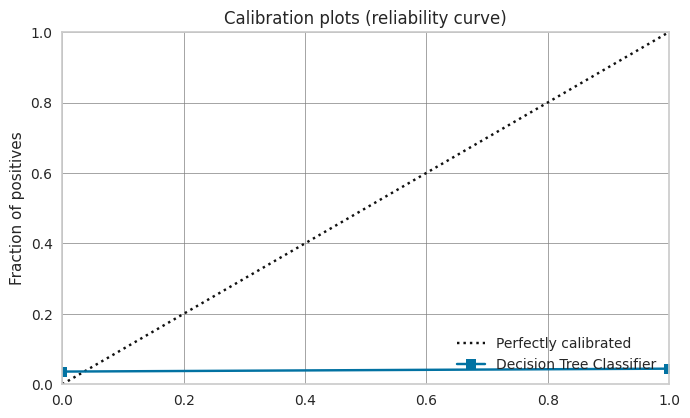

In [84]:
# check calbiration of default dt
plot_model(dt, plot='calibration')

In [85]:
# calibrate default dt
calibrated_dt = calibrate_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9635,0.5076,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9635,0.5046,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9635,0.5274,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9635,0.5244,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9635,0.5229,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9635,0.5371,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9635,0.5325,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9635,0.5332,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9635,0.5168,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

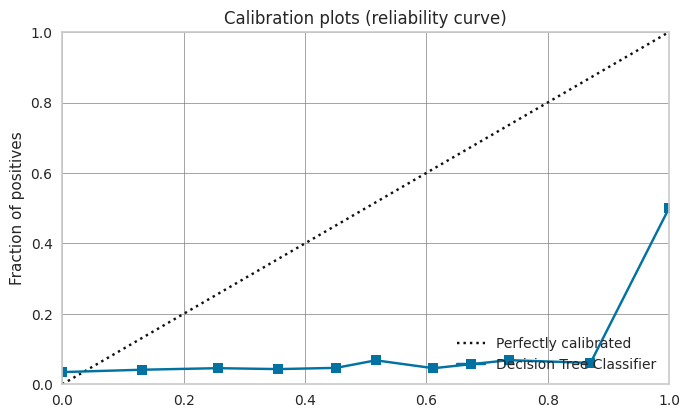

In [86]:
# check calbiration of calibrated dt
plot_model(calibrated_dt, plot='calibration')

Some other parameters that you might find very useful in `calibrate_model` are:

- calibrate_fold
- fit_kwargs
- method
- return_train_score
- groups

You can check the docstring of the function for more info.

In [87]:
help(calibrate_model)

Help on function calibrate_model in module pycaret.classification.functional:

calibrate_model(estimator, method: str = 'sigmoid', calibrate_fold: Union[int, Any, NoneType] = 5, fold: Union[int, Any, NoneType] = None, round: int = 4, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, return_train_score: bool = False) -> Any
    This function calibrates the probability of a given estimator using isotonic
    or logistic regression. The output of this function is a score grid with CV
    scores by fold. Metrics evaluated during CV can be accessed using the
    ``get_metrics`` function. Custom metrics can be added or removed using
    ``add_metric`` and ``remove_metric`` function. The ouput of the original estimator
    and the calibrated estimator (created using this function) might not differ much.
    In order to see the calibration differences, use 'calibration' plot in ``plot_model``
    to see the difference before and after.
    
    

### Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [88]:
# NEED TO DEBUG
# get leaderboard
# lb = get_leaderboard()
# lb

In [89]:
# NEED TO DEBUG
# select the best model based on F1
# lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [90]:
help(get_leaderboard)

Help on function get_leaderboard in module pycaret.classification.functional:

get_leaderboard(finalize_models: bool = False, model_only: bool = False, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True) -> pandas.core.frame.DataFrame
    This function returns the leaderboard of all models trained in the
    current setup.
    
    
    Example
    -------
    >>> from pycaret.classification import get_leaderboard
    >>> leaderboard = get_leaderboard()
    
    
    finalize_models: bool, default = False
        If True, will finalize all models in the 'Model' column.
    
    
    model_only: bool, default = False
        When set to False, only model object is returned, instead
        of the entire pipeline.
    
    
    fit_kwargs: dict, default = {} (empty dict)
        Dictionary of arguments passed to the fit method of the model.
        Ignored if finalize_models is False.
    
    
    groups: str or array-like, with shape (n_sa

### AutoML

This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [91]:
# automl()
automl(optimize="AUC")

VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=Non...
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn',
                                             subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0)),
                             ('str',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator='deprecated',
                                                 estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=123))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

### Check Fairness

There are many approaches to conceptualizing fairness. The check_fairness function follows the approach known as group fairness, which asks: which groups of individuals are at risk for experiencing harm. `check_fairness` provides fairness-related metrics between different groups (also called sub-population).

In [92]:
# check fairness
# check_fairness(best, sensitive_features=['Number of times pregnant'])

### Dashboard

The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out "Explainer Dashboard":

https://explainerdashboard.readthedocs.io

In [93]:
# dashboard function
# dashboard(dt, display_format='inline')  
# ValueError: The feature names should match those that were passed during fit. (after running for a very long time!)

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ps_car_01_cat_0__0
- ps_car_01_cat_10__0
- ps_car_01_cat_11__0
- ps_car_01_cat_1__0
- ps_car_01_cat_2__0
- ...
Feature names seen at fit time, yet now missing:
- ps_car_01_cat_0.0
- ps_car_01_cat_1.0
- ps_car_01_cat_10.0
- ps_car_01_cat_11.0
- ps_car_01_cat_2.0
- ...


### Deepcheck

This function runs a full suite check over a trained model using the `deepchecks` library. For more information check out "deepchecks":

https://deepchecks.com/

In [94]:
# deep check function
deep_check(best)

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_WL7JH5K8LKJK67OE98DUJ7V0P">Full Suite</h1>\n<…

### EDA

This function generates automated Exploratory Data Analysis (EDA) using the `AutoViz` library. You must install Autoviz separately pip install autoviz to use this function. For more information check out "AutoViz":

https://github.com/AutoViML/AutoViz

In [95]:
# NEED TO DEBUG (install 'autoviz' but still don't work - see Regression Tutorial)
# eda function
# eda()

### Create App

This function creates a basic gradio app for inference.

In [96]:
# create gradio app
create_app(best)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


### Create API

This function takes an input model and creates a POST API for inference.

In [97]:
# create api
create_api(best, api_name='my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [98]:
# !python my_first_api.py

In [99]:
# check out the .py file created with this magic command
# %load my_first_api.py

### Create Docker

This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [100]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [101]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [102]:
# check out the requirements file created with this magic command
# %load requirements.txt

### Finalize Model

This function trains a given model on the entire dataset including the hold-out set.

In [103]:
final_best = finalize_model(best)

In [104]:
final_best

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['ps_ind_01', 'ps_ind_03',
                                             'ps_ind_06_bin', 'ps_ind_07_bin',
                                             'ps_ind_08_bin', 'ps_ind_09_bin',
                                             'ps_ind_10_bin', 'ps_ind_11_bin',
                                             'ps_ind_12_bin', 'ps_ind_13_bin',
                                             'ps_ind_14', 'ps_ind_15',
                                             'ps_ind_16_bin', 'ps_ind_17_bin',
                                             'ps_ind_18_bin', 'ps_reg_...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=225, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

### Convert Model

This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [105]:
# transpiles learned function to java
# print(convert_model(best, language='java'))
# NotImplementedError: Model 'sklearn_GradientBoostingClassifier' is not supported

NotImplementedError: Model 'sklearn_GradientBoostingClassifier' is not supported

### Deploy Model

This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID

- AWS Secret Key Access

- Default Region Name (can be seen under Global settings on your AWS console)

- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: 

https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable). Learn more about it: 

https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name='my_first_platform_on_aws', platform='aws', authentication={'bucket': 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name='my_first_platform_on_aws', platform='aws', authentication={'bucket': 'pycaret-test'})
# loaded_from_aws

### Save / Load Model

This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [106]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ps_ind_01', 'ps_ind_03',
                                              'ps_ind_06_bin', 'ps_ind_07_bin',
                                              'ps_ind_08_bin', 'ps_ind_09_bin',
                                              'ps_ind_10_bin', 'ps_ind_11_bin',
                                              'ps_ind_12_bin', 'ps_ind_13_bin',
                                              'ps_ind_14', 'ps_ind_15',
                                              'ps_ind_16_bin', 'ps_ind_17_bin',
                                              'ps_ind_18_bin', 'ps_reg_...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_depth=3, max_features=None,


In [107]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['ps_ind_01', 'ps_ind_03',
                                             'ps_ind_06_bin', 'ps_ind_07_bin',
                                             'ps_ind_08_bin', 'ps_ind_09_bin',
                                             'ps_ind_10_bin', 'ps_ind_11_bin',
                                             'ps_ind_12_bin', 'ps_ind_13_bin',
                                             'ps_ind_14', 'ps_ind_15',
                                             'ps_ind_16_bin', 'ps_ind_17_bin',
                                             'ps_ind_18_bin', 'ps_reg_...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=225, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

### Save / Load Experiment

This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [108]:
# save experiment
save_experiment('my_experiment')

In [110]:
# load experiment from disk
# exp_from_disk = load_experiment('my_experiment', data=data)
exp_from_disk = load_experiment('my_experiment', data=train_data)

,Description,Value
0,Session id,1984
1,Target,target
2,Target type,Binary
3,Original data shape,"(476170, 58)"
4,Transformed data shape,"(476170, 110)"
5,Transformed train set shape,"(333319, 110)"
6,Transformed test set shape,"(142851, 110)"
7,Ordinal features,6
8,Numeric features,43
9,Categorical features,14
